## MNIST Multiclass Logistic Regression

**AIM**: Building a multi-class logistic regression model from scratch.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import torch
from torch.nn import functional as F
from sklearn.model_selection import train_test_split

In [27]:
torch.manual_seed(42)

In [28]:
dataset = datasets.load_digits()
images = dataset['images']
target = dataset['target']

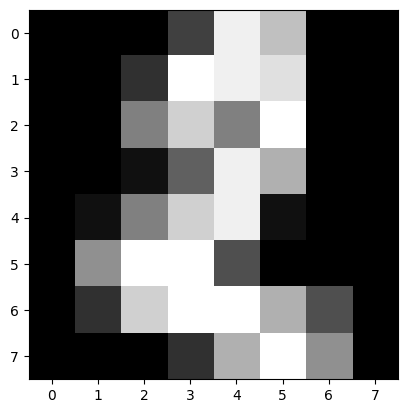

In [4]:
plt.imshow(images[2], cmap='gray')

### Preprocessing

In [5]:
y_true = F.one_hot(torch.tensor(target), num_classes=10)
# numpy uses float64 while pytorch uses float32 by default
images = torch.tensor(images, dtype=torch.float32).reshape(-1,64) # change (1797,8,8) into (1797, 64)

# normalization
images = (images - images.mean())/ images.std()

In [6]:
learning_rate = 0.03
loss_log = []

In [7]:
# initiallize parameters
W = torch.rand((10, 64), requires_grad=True)
b = torch.rand((1, 10), requires_grad=True)

### Softmax and Cross Entropy function

&emsp;&emsp;&emsp;&emsp;**Softmax function** <br>
<br>
    $$\Large p_k(x)=\frac{e^{x_k}}{\sum_{k=1}^{K}e^{x_k}}$$
    
&emsp;&emsp;&emsp;&emsp;**Cross Entropy** <br>
<br>
    $$\Large L = - \frac{1}{N}\sum_{i=1}^{N}\sum_{k=1}^{K}*t_{ik}*log(p_k(x_i))$$

In [8]:
# softmax function
'''
Numerator:
    When x is large enough, e_x becomes inf. To avoid it, substract max(x) from each value. 
    Under this conditoin, large x leads to e_{-inf} ~= 0. 
Denominator:
    To avoid denominator having 0, add 1e-10
'''

def softmax(x):
    e_x = torch.exp(x - torch.max(x, dim=-1, keepdim=True)[0])
    return e_x / torch.sum(e_x, dim=-1,keepdim=True) + 1e-10

# cross entropy function
'''
When $p_k(x_i) =0$, $log(0$) becomes -inf. To avoid this, add small number 1e-10.
'''
def cross_entropy(y_true, y_pred):
    return -torch.sum(y_true * torch.log(y_pred+ 1e-10)) / y_true.shape[0]
    

In [10]:
for epoch in range(5):
    running_loss = 0
    for i in range(len(target)):
        y_true_ = y_true[i].reshape(-1,10) # data_num x class_num.
        X = images[i].reshape(-1, 64) # data_num x feature_num

        Z = X @ W.T + b

        # calculate y_pred with softmax function
        y_pred = softmax(Z)

        # calcualte loss with cross entropy function
        loss = cross_entropy(y_true_, y_pred)
        loss_log.append(loss.item())
        running_loss += loss.item()

        # calculate gradient
        loss.backward()

        # update parameter
        with torch.no_grad():
            W -= learning_rate * W.grad
            b -= learning_rate * b.grad

        # initialize gradient
        W.grad.zero_()
        b.grad.zero_()

    #print loss
    print(f'epoch: {epoch+1}: {running_loss/len(target)}')

epoch: 1: 0.42592922646085757
epoch: 2: 0.14197200705340934
epoch: 3: 0.11155106615835432
epoch: 4: 0.09480606085389329
epoch: 5: 0.0830450725027446


### Model evalulation

In [11]:
# calculate accuray correct predictions / ALL predictions

X = torch.tensor(images, dtype=torch.float32)
Z = X@W.T + b
y_pred = softmax(Z)

# get an index of the highest value corresponding to a predicted class 
# with torch.argmax(y_pred). Then compare index of y_pred with index of y_true
# sum up the number of True (True== 1)
accuracy = (torch.sum(torch.argmax(y_pred, dim=-1) == torch.argmax(y_true, dim=-1)) / y_true.shape[0]).item()

print(f'Accuracy : {accuracy:.4f}')

Accuracy : 0.9711


/tmp/ipykernel_2275/2649051685.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X = torch.tensor(images, dtype=torch.float32)


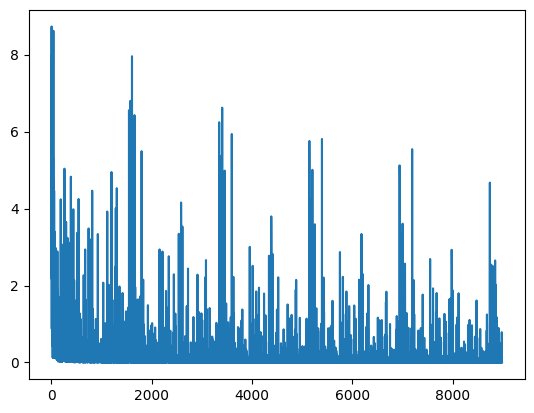

In [12]:
plt.plot(loss_log)

## Mini-batch Learning

In [13]:
batch_size = 30
num_batches = np.ceil(len(target)/batch_size).astype(int)
learning_rate = 0.03
loss_log = []

# initiallize parameters
W = torch.rand((10, 64), requires_grad=True)
b = torch.rand((1, 10), requires_grad=True)

for epoch in range(5):
    
    shuffled_indices = np.random.permutation(len(target))
    running_loss = 0
    
    for i in range(num_batches):

        start = i + batch_size
        end = start + batch_size
        batch_indices = shuffled_indices[start:end]

        # place break point
        # import pdb; pdb.set_trace()
        
        y_true_ = y_true[batch_indices,:] # data_num x class_num.
        X = images[batch_indices,:] # data_num x feature_num

        Z = X @ W.T + b

        # calculate y_pred with softmax function
        y_pred = softmax(Z)

        # calcualte loss with cross entropy function
        loss = cross_entropy(y_true_, y_pred)
        loss_log.append(loss.item())
        running_loss += loss.item()

        # calculate gradient
        loss.backward()

        # update parameter
        with torch.no_grad():
            W -= learning_rate * W.grad
            b -= learning_rate * b.grad

        # initialize gradient
        W.grad.zero_()
        b.grad.zero_()

    #print loss
    print(f'epoch: {epoch+1}: {running_loss/num_batches}')

epoch: 1: 1.9534498631954194
epoch: 2: 0.9459826062122981
epoch: 3: 0.7458159108956655
epoch: 4: 0.38649510194857917
epoch: 5: 0.460583599905173


In [14]:
# calculate accuray correct predictions / ALL predictions

X = torch.tensor(images, dtype=torch.float32)
Z = X@W.T + b
y_pred = softmax(Z)

accuracy = (torch.sum(torch.argmax(y_pred, dim=-1) == torch.argmax(y_true, dim=-1)) / y_true.shape[0]).item()

print(f'Accuracy : {accuracy:.4f}')

Accuracy : 0.8843


/tmp/ipykernel_2275/4161940044.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X = torch.tensor(images, dtype=torch.float32)


## Train data and test data

In [29]:
dataset = datasets.load_digits()
images = dataset['images']
target = dataset['target']

In [30]:
X_train, X_val, y_train, y_val = train_test_split(images,target, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

(1437, 8, 8) (1437,)
(360, 8, 8) (360,)


In [31]:
# preprocessing data
X_train = torch.tensor(X_train, dtype=torch.float32).reshape(-1,64) 
y_train = F.one_hot(torch.tensor(y_train), num_classes=10)

X_val = torch.tensor(X_val, dtype=torch.float32).reshape(-1,64) 
y_val = F.one_hot(torch.tensor(y_val), num_classes=10)

#normalization 
X_train_mean = X_train.mean()
X_train_std = X_train.std()
X_train = (X_train - X_train_mean) / X_train_std
X_val = (X_val - X_train_mean) / X_train_std

In [32]:
epochs = 30
batch_size = 30
num_batches = np.ceil(len(y_train)/batch_size).astype(int)
loss_log = []
learning_rate = 0.03

# logs
train_losses = []
val_losses = []
val_accuracies = []

# initiallize parameters
W = torch.rand((10, 64), requires_grad=True)
b = torch.rand((1, 10), requires_grad=True)

for epoch in range(epochs):
    
    shuffled_indices = np.random.permutation(len(y_train))
    running_loss = 0
    
    for i in range(num_batches):

        start = i * batch_size
        end = start + batch_size
        batch_indices = shuffled_indices[start:end]

        # place break point
        # import pdb; pdb.set_trace()
        
        y_true_ = y_train[batch_indices,:] # data_num x class_num.
        X = X_train[batch_indices,:] # data_num x feature_num

        Z = X @ W.T + b

        # calculate y_pred with softmax function
        y_pred = softmax(Z)

        # calcualte loss with cross entropy function
        loss = cross_entropy(y_true_, y_pred)
        loss_log.append(loss.item())
        running_loss += loss.item()

        # calculate gradient
        loss.backward()

        # update parameter
        with torch.no_grad():
            W -= learning_rate * W.grad
            b -= learning_rate * b.grad

        # initialize gradient
        W.grad.zero_()
        b.grad.zero_()

    # validation
    with torch.no_grad():
        Z_val = X_val@W.T + b
        y_pred_val = softmax(Z_val)

        val_loss = cross_entropy(y_val, y_pred_val)
        val_accuracy = (torch.sum(torch.argmax(y_pred_val, dim=-1) == torch.argmax(y_val, dim=-1)) / y_val.shape[0])

    train_losses.append(running_loss/num_batches)
    val_losses.append(val_loss.item())
    val_accuracies.append(val_accuracy.item())

    #print log
    print(f'epoch: {epoch+1}: train loss :{running_loss/num_batches:.4f} val loss: {val_loss:.4f} val accuracy {val_accuracy:.4f}')

epoch: 1: train loss :2.7264 val loss: 1.7324 val accuracy 0.4222
epoch: 2: train loss :1.3641 val loss: 1.0299 val accuracy 0.7028
epoch: 3: train loss :0.8860 val loss: 0.7325 val accuracy 0.8083
epoch: 4: train loss :0.6667 val loss: 0.5825 val accuracy 0.8556
epoch: 5: train loss :0.5455 val loss: 0.4886 val accuracy 0.8833
epoch: 6: train loss :0.4684 val loss: 0.4269 val accuracy 0.8944
epoch: 7: train loss :0.4169 val loss: 0.3841 val accuracy 0.9083
epoch: 8: train loss :0.3791 val loss: 0.3550 val accuracy 0.9167
epoch: 9: train loss :0.3485 val loss: 0.3288 val accuracy 0.9278
epoch: 10: train loss :0.3253 val loss: 0.3034 val accuracy 0.9361
epoch: 11: train loss :0.3051 val loss: 0.2876 val accuracy 0.9333
epoch: 12: train loss :0.2895 val loss: 0.2725 val accuracy 0.9333
epoch: 13: train loss :0.2749 val loss: 0.2616 val accuracy 0.9361
epoch: 14: train loss :0.2626 val loss: 0.2478 val accuracy 0.9361
epoch: 15: train loss :0.2522 val loss: 0.2372 val accuracy 0.9389
epoc

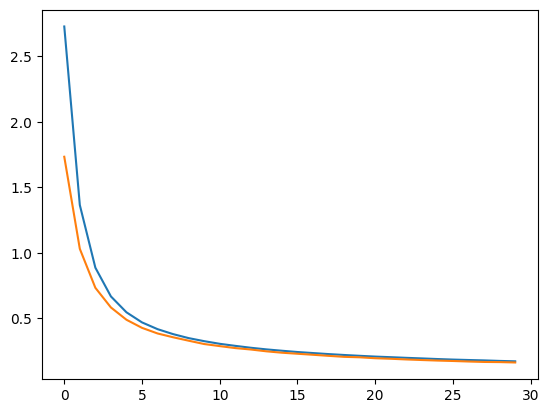

In [33]:
plt.plot(train_losses)
plt.plot(val_losses)